# Citim datele

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(pd.__version__) #print pandas version, e.g., 0.24.2
#to upgrade: pip install --upgrade pandas

def load_data():
    xlsx_path = "output.xlsx"
    return pd.read_excel(xlsx_path)

In [2]:
announces = load_data()
announces.head()

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Tip compartimentare:,Vechime apartament:,Tip imobil:,Dotări:,Anul construcției:,Tip finisaj:,Materiale construcție:,Modalitate vânzare:,Facilități:,Data anunt,Cartier,Pret/mp
0,3,76.0,1,2.0,4,3.0,Nu,Semidecomandat,Nou,Bloc de apartamente,Modern/lux,2017,Modern/lux,"Beton, Cărămidă",Cash,NaN,28.04.2023,Marasti,3.355
1,2,58.0,1,NaN,2,1.0,Nu,Semidecomandat,Nou,Bloc de apartamente,Mobilat/utilat,2009,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1.172
2,2,44.0,1,1.0,1,NaN,Nu,Decomandat,Nou,Bloc de apartamente,Mobilat/utilat,2012,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1.795
3,3,70.0,2,1.0,3,NaN,Nu,Semidecomandat,Nou,Bloc de apartamente,Mobilat/utilat,2019,Finisat,Cărămidă,"Credit bancar, Cash",NaN,27.04.2023,Floreşti,1.271
4,2,54.0,1,1.0,4,1.0,Nu,Decomandat,Nou,Bloc de apartamente,Mobilat/utilat,2008,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1.278


# Analizam valorile de nan

In [3]:
announces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr. camere:             70 non-null     object 
 1   Suprafață utilă         70 non-null     float64
 2   Nr. băi:                70 non-null     int64  
 3   Nr. balcoane:           44 non-null     float64
 4   Etaj:                   70 non-null     int64  
 5   Locuri de parcare:      46 non-null     float64
 6   Boxă la subsol:         70 non-null     object 
 7   Tip compartimentare:    70 non-null     object 
 8   Vechime apartament:     70 non-null     object 
 9   Tip imobil:             70 non-null     object 
 10  Dotări:                 70 non-null     object 
 11  Anul construcției:      70 non-null     int64  
 12  Tip finisaj:            70 non-null     object 
 13  Materiale construcție:  54 non-null     object 
 14  Modalitate vânzare:     59 non-null     obje

# Eliminam duplicatele, iar pentru coloanele cu mai multe valori nan punem valoarea 0 

In [4]:
announces.drop_duplicates

announces['Nr. balcoane:'] = announces['Nr. balcoane:'].fillna(0)
announces['Locuri de parcare:'] = announces['Locuri de parcare:'].fillna(0)


data_announces=announces
data_announces.shape

(70, 19)

# Stergem coloanele irelevante

In [5]:
data_announces= data_announces.drop(columns=['Data anunt','Facilități:' ,'Vechime apartament:','Tip imobil:', 'Tip finisaj:', 'Materiale construcție:', 'Modalitate vânzare:', 'Tip compartimentare:', 'Dotări:' ], axis = 1)
data_announces.head()

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Anul construcției:,Cartier,Pret/mp
0,3,76.0,1,2.0,4,3.0,Nu,2017,Marasti,3.355
1,2,58.0,1,0.0,2,1.0,Nu,2009,Floreşti,1.172
2,2,44.0,1,1.0,1,0.0,Nu,2012,Floreşti,1.795
3,3,70.0,2,1.0,3,0.0,Nu,2019,Floreşti,1.271
4,2,54.0,1,1.0,4,1.0,Nu,2008,Floreşti,1.278


In [6]:
data_announces=data_announces.dropna()

# Prelucram datele

In [7]:
data_announces['Boxă la subsol:'] = data_announces['Boxă la subsol:'].replace({'Nu': 0, 'Da': 1})
data_announces['Nr. camere:'] = data_announces['Nr. camere:'].replace({'Garsonieră': 1})

In [8]:
data_announces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nr. camere:         70 non-null     object 
 1   Suprafață utilă     70 non-null     float64
 2   Nr. băi:            70 non-null     int64  
 3   Nr. balcoane:       70 non-null     float64
 4   Etaj:               70 non-null     int64  
 5   Locuri de parcare:  70 non-null     float64
 6   Boxă la subsol:     70 non-null     int64  
 7   Anul construcției:  70 non-null     int64  
 8   Cartier             70 non-null     object 
 9   Pret/mp             70 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 5.6+ KB


# Calculam vechimea cladirii

In [9]:
import datetime
data_announces['building_years']= datetime.datetime.now().year - data_announces['Anul construcției:']
data_announces= data_announces.drop(columns=['Anul construcției:' ], axis = 1)
data_announces


,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Cartier,Pret/mp,building_years
0,3,76.0,1,2.0,4,3.0,0,Marasti,3.355,6
1,2,58.0,1,0.0,2,1.0,0,Floreşti,1.172,14
2,2,44.0,1,1.0,1,0.0,0,Floreşti,1.795,11
3,3,70.0,2,1.0,3,0.0,0,Floreşti,1.271,4
4,2,54.0,1,1.0,4,1.0,0,Floreşti,1.278,15
...,...,...,...,...,...,...,...,...,...,...
65,3,60.0,1,1.0,1,1.0,0,Floreşti,1.417,1
66,2,40.0,1,1.0,3,1.0,0,Baciu,2.188,1
67,1,21.0,1,0.0,4,1.0,0,Dambul Rotund,1.848,33
68,1,11.0,1,0.0,2,0.0,0,Gruia,2.682,33


# Determinam cate anunturi avem din fiecare cartier

In [10]:
location_stats=data_announces.groupby('Cartier')['Cartier'].agg('count').sort_values(ascending=False)
location_stats

Cartier
Floreşti         29
Baciu             7
Manastur          6
Central           5
Grigorescu        3
Iris              3
Marasti           3
Semicentral       3
Dambul Rotund     2
Gruia             2
Sopor             2
Zorilor           2
Borhanci          1
Gheorgheni        1
Intre Lacuri      1
Name: Cartier, dtype: int64

# Codificare locatie


In [11]:
data_cod_locatie=data_announces

grouped = data_cod_locatie.groupby('Cartier')['Pret/mp'].mean().reset_index()
sorted_groups = grouped.sort_values('Pret/mp')
cod_locatie = 1
for index, row in sorted_groups.iterrows():
    location_area = row['Cartier']
    data_cod_locatie.loc[data_cod_locatie['Cartier'] == location_area, 'cod_locatie'] = cod_locatie
    cod_locatie += 1
print("Grupuri ordonate crescător după valoarea medie:")
print(sorted_groups)

print("Rezultatul final cu coloana cod_locatie:")
data_cod_locatie.sort_values('cod_locatie', ascending=True)
data_announces3= data_cod_locatie
data_announces3

Grupuri ordonate crescător după valoarea medie:
          Cartier    Pret/mp
0           Baciu   1.533571
10       Manastur   2.018333
9            Iris   2.054000
3   Dambul Rotund   2.174000
8    Intre Lacuri   2.214000
1        Borhanci   2.281000
6      Grigorescu   2.489000
7           Gruia   2.510500
12    Semicentral   2.530333
5      Gheorgheni   2.622000
2         Central   2.869400
14        Zorilor   2.975500
11        Marasti   3.047667
13          Sopor   3.572000
4        Floreşti  30.089034
Rezultatul final cu coloana cod_locatie:


,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Cartier,Pret/mp,building_years,cod_locatie
0,3,76.0,1,2.0,4,3.0,0,Marasti,3.355,6,13.0
1,2,58.0,1,0.0,2,1.0,0,Floreşti,1.172,14,15.0
2,2,44.0,1,1.0,1,0.0,0,Floreşti,1.795,11,15.0
3,3,70.0,2,1.0,3,0.0,0,Floreşti,1.271,4,15.0
4,2,54.0,1,1.0,4,1.0,0,Floreşti,1.278,15,15.0
...,...,...,...,...,...,...,...,...,...,...,...
65,3,60.0,1,1.0,1,1.0,0,Floreşti,1.417,1,15.0
66,2,40.0,1,1.0,3,1.0,0,Baciu,2.188,1,1.0
67,1,21.0,1,0.0,4,1.0,0,Dambul Rotund,1.848,33,4.0
68,1,11.0,1,0.0,2,0.0,0,Gruia,2.682,33,8.0


# Impartim setul de date


In [12]:
from sklearn.model_selection import train_test_split

X= data_announces3.drop(['Pret/mp',  'Cartier'], axis=1)
y= data_announces3['Pret/mp']



# Adaugare constanta

In [13]:
# Adaugă o coloană de 1 la începutul setului de date
#price per unit
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



# Antrenam modelul

In [14]:
from sklearn.linear_model import LinearRegression

# Inițializează modelul de regresie liniară cu o constanta
#price per unit
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
print("Pret/mp",model.score(X_test,y_test))



Pret/mp -0.07803632487166712


In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Efectuează o validare încrucișată pentru a evalua performanța modelului
#price per unit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(" Scores price per unit",cross_val_score(LinearRegression(fit_intercept=True), X, y, cv=cv))

 Scores price per unit [ -6843.26962583 -22631.18714591  -5215.20392671 -16817.16313539
 -18221.14830735]


In [16]:
#price per unit
col_names = ['intercept'] + list(data_announces3.columns[1:-1])


pd.DataFrame(model.coef_, col_names, columns=['coeficient'])

,coeficient
intercept,0.000000
Suprafață utilă,0.091455
Nr. băi:,-0.008581
Nr. balcoane:,0.427650
Etaj:,-0.171198
Locuri de parcare:,0.157176
Boxă la subsol:,0.085533
Cartier,1.165014
Pret/mp,-0.007761
building_years,-0.013353


In [17]:
#price per unit
y_pred= model.predict(X_test)

In [18]:
print("price per unit")
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred})

price per unit


,Y_test,Y_pred
57,2.273,1.546954
13,1.000,2.316923
26,3.049,3.954692
30,3.385,1.657649
48,1.533,1.540779
21,831.000,1.427064
17,1.439,2.618169
2,1.795,1.463444
16,2.121,1.837225
65,1.417,1.580749


# ANomalii

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluăm performanța modelului pe setul de testare
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculează predicția pentru setul de date de testare și afișează diferențele dintre valorile prezise și cele reale
y_pred = model.predict(X_test)
diff = np.abs(y_test - y_pred)
diff_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred, 'Diferenta': diff})
print(diff_df)

# Selectează pragul pentru diferențe și afișează anomaliile
threshold = 100
anomalies = diff_df[diff_df['Diferenta'] > threshold]
print("Anomaliile sunt:")
print(anomalies)
mean_diff = np.mean(diff_df['Diferenta'])
print(f"Media diferențelor este {mean_diff:.2f}")
print("Anomaliile sunt:")
exageret_anomalies=anomalies[anomalies['Diferenta'] > 2*mean_diff]
print(exageret_anomalies)  # afișează doar anomaliile exagerate (de peste 2x media diferențelor)
#
anomaly_indexes = exageret_anomalies.index.tolist()
anomaly_table = data_announces3.loc[anomaly_indexes]
print(anomaly_table)


Mean Absolute Error (MAE): 59.88376642655548
Root Mean Squared Error (RMSE): 221.71416920728936
     Y_test    Y_pred   Diferenta
57    2.273  1.546954    0.726046
13    1.000  2.316923    1.316923
26    3.049  3.954692    0.905692
30    3.385  1.657649    1.727351
48    1.533  1.540779    0.007779
21  831.000  1.427064  829.572936
17    1.439  2.618169    1.179169
2     1.795  1.463444    0.331556
16    2.121  1.837225    0.283775
65    1.417  1.580749    0.163749
27    1.311  1.989369    0.678369
25    1.295  1.832285    0.537285
3     1.271  2.128127    0.857127
69    2.214  2.129027    0.084973
Anomaliile sunt:
    Y_test    Y_pred   Diferenta
21   831.0  1.427064  829.572936
Media diferențelor este 59.88
Anomaliile sunt:
    Y_test    Y_pred   Diferenta
21   831.0  1.427064  829.572936
   Nr. camere:  Suprafață utilă  Nr. băi:  Nr. balcoane:  Etaj:  \
21           3             74.0         1            2.0      4   

    Locuri de parcare:  Boxă la subsol:   Cartier  Pret/mp  bui

In [20]:
#price per unit
data_announces3_cleaned = data_announces3.drop(anomaly_indexes)

X= data_announces3_cleaned.drop(['Pret/mp',  'Cartier'], axis=1)
y= data_announces3_cleaned['Pret/mp']

# Adaugă o coloană de 1 la începutul setului de date
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Inițializează modelul de regresie liniară cu o constanta
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
print("Price per uni score without anomalies",model.score(X_test,y_test))

Price per uni score without anomalies -0.3595290254769483


In [21]:
# Efectuează o validare încrucișată pentru a evalua performanța modelului
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print("Price per unit scores without anomalies",cross_val_score(LinearRegression(fit_intercept=True), X, y, cv=cv))

# Creează un nou array care conține numele coloanelor
col_names = ['intercept'] + list(data_announces3_cleaned.columns[1:-1])


print("Priceper unit",pd.DataFrame(model.coef_, col_names, columns=['coeficient']))

Price per unit scores without anomalies [-0.32906105 -0.06401493 -0.81824458  0.09610412  0.24965854]
Priceper unit                     coeficient
intercept             0.000000
Suprafață utilă       0.117337
Nr. băi:             -0.008531
Nr. balcoane:         0.616423
Etaj:                -0.082811
Locuri de parcare:    0.156621
Boxă la subsol:      -0.009281
Cartier               1.019759
Pret/mp              -0.003256
building_years       -0.007887


In [22]:
y_pred= model.predict(X_test)
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred})


,Y_test,Y_pred
57,2.273,1.618770
13,1.000,2.260582
27,1.311,2.026424
31,2.704,2.422949
51,1.797,2.029360
22,2.216,2.025587
17,1.439,2.604219
2,1.795,1.583762
16,2.121,1.746764
65,1.417,1.587883


# Grafic

Price per unit


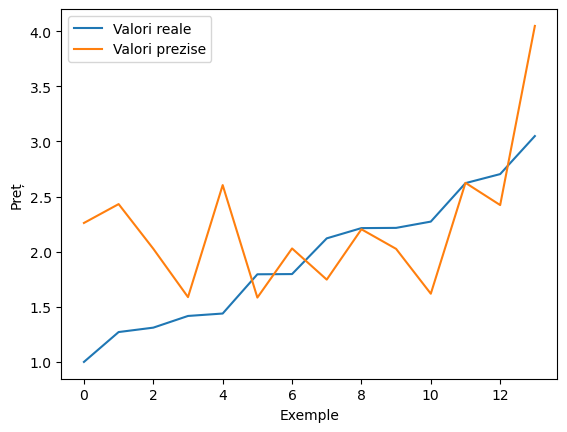

In [23]:
import matplotlib.pyplot as plt


results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred})

# Sortează valorile în ordine crescătoare pentru a le putea trasa graficul
results_df.sort_values(by=['Y_test'], inplace=True)

# Resetăm indexul pentru a ne asigura că valorile se potrivesc între cele două coloane
results_df = results_df.reset_index(drop=True)

print("Price per unit")

plt.plot(results_df['Y_test'], label='Valori reale')
plt.plot(results_df['Y_pred'], label='Valori prezise')
plt.xlabel('Exemple')
plt.ylabel('Preț')
plt.legend()
plt.show()